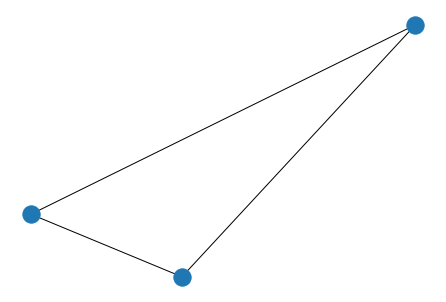

In [37]:
import networkx as nx
from matplotlib import pyplot as plt

class Graph:
    def __init__(self, edges_set):
        self.edges_set = edges_set
        self.node_set = []
        for i in edges_set:
            if (i.start_node not in self.node_set):
                self.node_set.append(i.start_node)
            if (i.end_node not in self.node_set):
                self.node_set.append(i.end_node)

class Edge:
    def __init__(self, start_node, end_node, weight):
        self.start_node = start_node
        self.end_node = end_node
        self.weight = weight


set_edges = [Edge(0, 1, 2), Edge(1, 2, 3), Edge(2, 0, 40)]

G = nx.Graph()

for z in set_edges:
    G.add_edge(str(z.start_node), str(z.end_node), weight = z.weight)

nx.draw(G)
plt.savefig('./graph.png')
plt.show()


In [38]:
import cirq
import numpy as np
import math
from matplotlib import pyplot as plt
import random
from scipy.optimize import minimize

# Defines the list of qubits

num = 3
depth = 4
rep = 1000
qubits = [cirq.GridQubit(0, i) for i in range(0, num)]


# Defines the initialization

def initialization(qubits):
    for i in qubits:
        yield cirq.H.on(i)

In [39]:
def cost_unitary(qubits, gamma):
    for i in set_edges:
        yield cirq.ZZPowGate(exponent=-1*gamma/math.pi).on(qubits[i.start_node], qubits[i.end_node])

# Defines the mixer unitary

def mixer_unitary(qubits, alpha):
    for i in range(0, len(qubits)):
        yield cirq.XPowGate(exponent=-1*alpha/math.pi).on(qubits[i])

In [40]:
def create_circuit(params):

    gamma = [params[0], params[2], params[4], params[6]]
    alpha = [params[1], params[3], params[5], params[7]]

    circuit = cirq.Circuit()
    circuit.append(initialization(qubits))
    for i in range(0, depth):
        circuit.append(cost_unitary(qubits, gamma[i]))
        circuit.append(mixer_unitary(qubits, alpha[i]))
    circuit.append(cirq.measure(*qubits, key='x'))
    print(circuit)

    simulator = cirq.Simulator()
    results = simulator.run(circuit, repetitions=rep)
    results = str(results)[2:].split(", ")
    new_res = []
    for i in range(0, rep):
        hold = []
        for j in range(0, num):
            hold.append(int(results[j][i]))
        new_res.append(hold)

    return new_res
def cost_function(params):

    av = create_circuit(params)
    total_cost = 0
    for i in range(0, len(av)):
        for j in set_edges:
            total_cost += j.weight * 0.5*( ( (1 - 2*av[i][j.start_node]) * (1 - 2*av[i][j.end_node]) ) - 1)
    total_cost = float(total_cost)/rep

    print("Cost: "+str(total_cost))

    return total_cost


                                     ┌───────────────┐                                     ┌─────────────────┐                                    ┌───────────────┐                                     ┌────────────────┐
(0, 0): ───H───ZZ─────────────────────ZZ─────────────────X^0.404───ZZ───────────────────────ZZ───────────────────X^(1/12)───ZZ─────────────────────ZZ─────────────────X^0.245───ZZ───────────────────────ZZ──────────────────X^0.045───M('x')───
               │                      │                            │                        │                               │                      │                            │                        │                             │
(0, 1): ───H───ZZ^-0.22───ZZ──────────┼───────X^0.404──────────────ZZ^-0.045───ZZ───────────┼────────X^(1/12)───────────────ZZ^-0.14───ZZ──────────┼───────X^0.245──────────────ZZ^-0.936───ZZ───────────┼────────X^0.045──────────────M────────
                          │           │                           

Cost: -23.858
                                     ┌───────────────┐                                     ┌─────────────────┐                                      ┌─────────────────┐                                      ┌────────────────┐
(0, 0): ───H───ZZ─────────────────────ZZ─────────────────X^0.404───ZZ───────────────────────ZZ───────────────────X^(1/12)───ZZ───────────────────────ZZ───────────────────X^-0.073───ZZ───────────────────────ZZ──────────────────X^0.045───M('x')───
               │                      │                            │                        │                               │                        │                               │                        │                             │
(0, 1): ───H───ZZ^-0.22───ZZ──────────┼───────X^0.404──────────────ZZ^-0.045───ZZ───────────┼────────X^(1/12)───────────────ZZ^-0.458───ZZ───────────┼────────X^-0.073───────────────ZZ^-0.936───ZZ───────────┼────────X^0.045──────────────M────────
                          │     

                                       ┌───────────────┐                                  ┌───────────────┐                                       ┌─────────────────┐                                         ┌───────────────────┐
(0, 0): ───H───ZZ───────────────────────ZZ─────────────────X^0.24───ZZ─────────────────────ZZ─────────────────X^0.094───ZZ─────────────────────────ZZ───────────────────X^0.268───ZZ───────────────────────────ZZ─────────────────────X^(1/13)───M('x')───
               │                        │                           │                      │                            │                          │                              │                            │                                 │
(0, 1): ───H───ZZ^-0.216───ZZ───────────┼────────X^0.24─────────────ZZ^0.046───ZZ──────────┼───────X^0.094──────────────ZZ^(-6/13)───ZZ────────────┼─────────X^0.268──────────────ZZ^(-13/14)───ZZ─────────────┼──────────X^(1/13)───────────────M────────
                           

Cost: -28.796
                                       ┌────────────────┐                                   ┌───────────────┐                                     ┌────────────────┐                                     ┌─────────────────┐
(0, 0): ───H───ZZ───────────────────────ZZ──────────────────X^0.405───ZZ─────────────────────ZZ─────────────────X^0.089───ZZ───────────────────────ZZ──────────────────X^0.157───ZZ───────────────────────ZZ───────────────────X^-0.018───M('x')───
               │                        │                             │                      │                            │                        │                             │                        │                               │
(0, 1): ───H───ZZ^-0.192───ZZ───────────┼────────X^0.405──────────────ZZ^0.031───ZZ──────────┼───────X^0.089──────────────ZZ^-0.411───ZZ───────────┼────────X^0.157──────────────ZZ^-0.905───ZZ───────────┼────────X^-0.018───────────────M────────
                           │            │

Cost: -30.459
                                       ┌────────────────┐                                     ┌────────────────┐                                     ┌────────────────┐                                     ┌─────────────────┐
(0, 0): ───H───ZZ───────────────────────ZZ──────────────────X^0.287───ZZ───────────────────────ZZ──────────────────X^0.147───ZZ───────────────────────ZZ──────────────────X^0.164───ZZ───────────────────────ZZ───────────────────X^(1/11)───M('x')───
               │                        │                             │                        │                             │                        │                             │                        │                               │
(0, 1): ───H───ZZ^-0.229───ZZ───────────┼────────X^0.287──────────────ZZ^-0.018───ZZ───────────┼────────X^0.147──────────────ZZ^(-3/7)───ZZ───────────┼────────X^0.164──────────────ZZ^-0.911───ZZ───────────┼────────X^(1/11)───────────────M────────
                           │ 

Cost: -30.589
                                       ┌────────────────┐                                   ┌───────────────┐                                     ┌────────────────┐                                     ┌────────────────┐
(0, 0): ───H───ZZ───────────────────────ZZ──────────────────X^0.311───ZZ─────────────────────ZZ─────────────────X^0.104───ZZ───────────────────────ZZ──────────────────X^(1/6)───ZZ───────────────────────ZZ──────────────────X^0.081───M('x')───
               │                        │                             │                      │                            │                        │                             │                        │                             │
(0, 1): ───H───ZZ^-0.218───ZZ───────────┼────────X^0.311──────────────ZZ^0.001───ZZ──────────┼───────X^0.104──────────────ZZ^-0.421───ZZ───────────┼────────X^(1/6)──────────────ZZ^-0.883───ZZ───────────┼────────X^0.081──────────────M────────
                           │            │       

Cost: -30.09
                                       ┌─────────────────┐                                      ┌────────────────┐                                       ┌──────────────────┐                                      ┌────────────────┐
(0, 0): ───H───ZZ───────────────────────ZZ───────────────────X^(4/13)───ZZ───────────────────────ZZ──────────────────X^0.109───ZZ─────────────────────────ZZ────────────────────X^(2/11)───ZZ───────────────────────ZZ──────────────────X^0.078───M('x')───
               │                        │                               │                        │                             │                          │                                │                        │                             │
(0, 1): ───H───ZZ^-0.217───ZZ───────────┼────────X^(4/13)───────────────ZZ^-0.007───ZZ───────────┼────────X^0.109──────────────ZZ^(-5/12)───ZZ────────────┼─────────X^(2/11)───────────────ZZ^(-8/9)───ZZ───────────┼────────X^0.078──────────────M────────
         

Cost: -31.25
                                         ┌──────────────────┐                                      ┌────────────────┐                                     ┌────────────────┐                                     ┌────────────────┐
(0, 0): ───H───ZZ─────────────────────────ZZ────────────────────X^(5/16)───ZZ───────────────────────ZZ──────────────────X^0.105───ZZ───────────────────────ZZ──────────────────X^(1/6)───ZZ───────────────────────ZZ──────────────────X^0.082───M('x')───
               │                          │                                │                        │                             │                        │                             │                        │                             │
(0, 1): ───H───ZZ^(-3/14)───ZZ────────────┼─────────X^(5/16)───────────────ZZ^-0.001───ZZ───────────┼────────X^0.105──────────────ZZ^-0.425───ZZ───────────┼────────X^(1/6)──────────────ZZ^-0.884───ZZ───────────┼────────X^0.082──────────────M────────
                 

Cost: -31.276
                                       ┌────────────────┐                                   ┌───────────────┐                                   ┌───────────────┐                                     ┌────────────────┐
(0, 0): ───H───ZZ───────────────────────ZZ──────────────────X^0.315───ZZ─────────────────────ZZ─────────────────X^0.107───ZZ─────────────────────ZZ─────────────────X^(1/6)───ZZ───────────────────────ZZ──────────────────X^0.082───M('x')───
               │                        │                             │                      │                            │                      │                            │                        │                             │
(0, 1): ───H───ZZ^-0.211───ZZ───────────┼────────X^0.315──────────────ZZ^0.001───ZZ──────────┼───────X^0.107──────────────ZZ^-0.42───ZZ──────────┼───────X^(1/6)──────────────ZZ^-0.884───ZZ───────────┼────────X^0.082──────────────M────────
                           │            │                   

Cost: -29.785
                                       ┌────────────────┐                           ┌───────────┐                                     ┌────────────────┐                                     ┌────────────────┐
(0, 0): ───H───ZZ───────────────────────ZZ──────────────────X^0.314───ZZ─────────────ZZ─────────────X^0.106───ZZ───────────────────────ZZ──────────────────X^(1/6)───ZZ───────────────────────ZZ──────────────────X^0.082───M('x')───
               │                        │                             │              │                        │                        │                             │                        │                             │
(0, 1): ───H───ZZ^-0.213───ZZ───────────┼────────X^0.314──────────────ZZ^0───ZZ──────┼───X^0.106──────────────ZZ^-0.422───ZZ───────────┼────────X^(1/6)──────────────ZZ^-0.884───ZZ───────────┼────────X^0.082──────────────M────────
                           │            │                                    │       │          

Cost: -30.715
                                         ┌─────────────────┐                           ┌───────────┐                                     ┌────────────────┐                                     ┌────────────────┐
(0, 0): ───H───ZZ─────────────────────────ZZ───────────────────X^0.314───ZZ─────────────ZZ─────────────X^0.105───ZZ───────────────────────ZZ──────────────────X^0.165───ZZ───────────────────────ZZ──────────────────X^0.082───M('x')───
               │                          │                              │              │                        │                        │                             │                        │                             │
(0, 1): ───H───ZZ^(-3/14)───ZZ────────────┼─────────X^0.314──────────────ZZ^0───ZZ──────┼───X^0.105──────────────ZZ^-0.422───ZZ───────────┼────────X^0.165──────────────ZZ^-0.884───ZZ───────────┼────────X^0.082──────────────M────────
                            │             │                                     │   

                                         └─────────────────┘                           └───────────┘                                     └────────────────┘                                     └────────────────┘
Cost: -31.192
                                         ┌─────────────────┐                           ┌───────────┐                                     ┌────────────────┐                                     ┌────────────────┐
(0, 0): ───H───ZZ─────────────────────────ZZ───────────────────X^0.314───ZZ─────────────ZZ─────────────X^0.105───ZZ───────────────────────ZZ──────────────────X^0.165───ZZ───────────────────────ZZ──────────────────X^0.082───M('x')───
               │                          │                              │              │                        │                        │                             │                        │                             │
(0, 1): ───H───ZZ^(-3/14)───ZZ────────────┼─────────X^0.314──────────────ZZ^0───ZZ──────┼───X^0.105───────

                                         └─────────────────┘                           └───────────┘                                     └────────────────┘                                     └────────────────┘
Cost: -30.286
                                         ┌─────────────────┐                           ┌───────────┐                                     ┌────────────────┐                                     ┌────────────────┐
(0, 0): ───H───ZZ─────────────────────────ZZ───────────────────X^0.314───ZZ─────────────ZZ─────────────X^0.105───ZZ───────────────────────ZZ──────────────────X^0.165───ZZ───────────────────────ZZ──────────────────X^0.082───M('x')───
               │                          │                              │              │                        │                        │                             │                        │                             │
(0, 1): ───H───ZZ^(-3/14)───ZZ────────────┼─────────X^0.314──────────────ZZ^0───ZZ──────┼───X^0.105───────

Cost: -30.49
                                         ┌─────────────────┐                           ┌───────────┐                                     ┌────────────────┐                                     ┌────────────────┐
(0, 0): ───H───ZZ─────────────────────────ZZ───────────────────X^0.314───ZZ─────────────ZZ─────────────X^0.105───ZZ───────────────────────ZZ──────────────────X^0.165───ZZ───────────────────────ZZ──────────────────X^0.082───M('x')───
               │                          │                              │              │                        │                        │                             │                        │                             │
(0, 1): ───H───ZZ^(-3/14)───ZZ────────────┼─────────X^0.314──────────────ZZ^0───ZZ──────┼───X^0.105──────────────ZZ^-0.422───ZZ───────────┼────────X^0.165──────────────ZZ^-0.884───ZZ───────────┼────────X^0.082──────────────M────────
                            │             │                                     │    

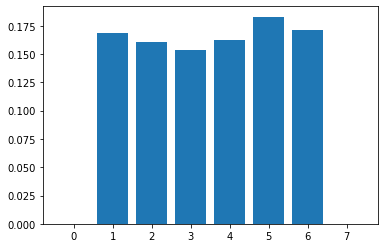

In [41]:
# Defines the optimization method

init =[float(random.randint(-314, 314))/float(100) for i in range(0, 8)]
out = minimize(cost_function, x0=init, method="COBYLA", options={'maxiter':100})
# print(out)

optimal_params = out['x']
f = create_circuit(optimal_params)

# Creates visualization of the optimal state

nums = []
freq = []

for i in range(0, len(f)):
    number = 0
    for j in range(0, len(f[i])):
        number += 2**(len(f[i])-j-1)*f[i][j]
    if (number in nums):
        freq[nums.index(number)] = freq[nums.index(number)] + 1
    else:
        nums.append(number)
        freq.append(1)

freq = [s/sum(freq) for s in freq]

# print(nums)
# print(freq)

x = range(0, 2**num)
y = []
for i in range(0, len(x)):
    if (i in nums):
        y.append(freq[nums.index(i)])
    else:
        y.append(0)

plt.bar(x, y)
plt.show()
